<a href="https://colab.research.google.com/github/SHAZAN01/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

Loading data

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
df.isna().sum()

x    0
y    1
dtype: int64

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Train_test_split

In [ ]:
train_input  = np.array(df.x[:560]).reshape(560,1)
train_output =  np.array(df.y[:560]).reshape(560,1)


In [ ]:
test_input =  np.array(df.x[560:]).reshape(139,1)
test_output = np.array(df.y[560:]).reshape(139,1)

In [ ]:
print(train_input.shape,
train_output.shape,
test_input.shape,
test_output.shape)

(560, 1) (560, 1) (139, 1) (139, 1)


In [ ]:
train_input

train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['x'],df['y'],test_size=0.2,random_state=23)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((559,), (140,), (559,), (140,))

####  Forward Propogation

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [ ]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

#### Defining Cost Function

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**

where y are the actual or true values and f(x) are the predicted values.

In [ ]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

#### Gradient Descent for Backpropagation

<u>Using Chain Rule:</u>
- cost
- f = f(x)

Partial Derivative of cost function w.r.t m
**dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c
**dcost/dc = dcost/df * df/dc **

<u>Partial Derivatives:</u>
- dc/df = (y - f) * -1
- df/dw = x
- df/db = 1

In [ ]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

####  Update the Parameters

- m = m - (learning_rate * dm)
- c = c - (learning_rate * dc)

In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

####  **Training the Data**

Sequence of Steps:

- Forward Propagation
- Cost Function
- Backward Propagation
- Update Parameters

In [ ]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 15)

In [ ]:
print(parameters)

{'m': 1.001006983646702, 'c': -0.34396915916163046}


Data Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(train_input, train_output)

LinearRegression()

In [ ]:
y_pred = linear_reg.predict(test_input)

In [ ]:
from sklearn.metrics import  mean_squared_error
error = mean_squared_error(y_pred,test_output)

In [ ]:
error

8.139745394473112

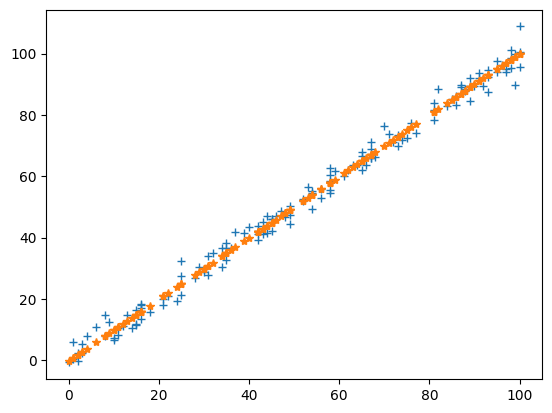

In [ ]:
plt.plot(test_input,test_output,'+')
plt.plot(test_input,y_pred,'*')
plt.show()

***Accuracy*** is not a good measure of the performance of a linear regression model. This is because linear regression is a continuous model, while accuracy is a discrete measure. In other words, linear regression predicts a continuous value, such as a number, while accuracy is a measure of how many predictions were correct.

Instead of accuracy, there are several other metrics that can be used to evaluate the performance of a linear regression model. These metrics include:

**Mean squared error (MSE):**

This metric measures the average squared difference between the predicted values and the actual values.


**Root mean squared error (RMSE):**

This metric is the square root of the MSE. It is a more interpretable measure of the error than the MSE.


**Mean absolute error (MAE):**

This metric measures the average absolute difference between the predicted values and the actual values.


**R-squared:**

This metric measures the proportion of the variance in the target variable that is explained by the linear regression model.



The best metric to use depends on the specific application. For example, if you are trying to predict a continuous value, such as the price of a house, then the RMSE or MAE might be the best metrics to use. If you are trying to predict a binary value, such as whether or not a customer will click on an ad, then the accuracy might be the best metric to use.

###Performance metrics for regression

1. Mean Square error
2. R2-score
3. Mean Absoulute error

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your target values y_true and predicted values y_pred
# Replace y_true and y_pred with your actual data

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)

# Print the scores
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
